In [24]:
import sys
sys.path.append('../')

import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import json

## Data Collection

Before you can begin here you're going to have to collect some data driving around.  Run the simulator in sysID_data mode to do this (command below).  Just drive around, accelerating and braking as you normally would.  After driving around for a minute or two press 's' to save your data (You should receive a confirmation).

python simulator.py --mode sysID_data

As a reminder controls in the simulator are as follows:

1.Press 'f' to get started (this puts you in forward gear)

2.Arrow keys to control.

3.Control C to exit simulator

Don't forget to save your data before exiting!

If your interested in further details during this assignment or next weeks, please reference the fully commented simulator.py file.  This file handles the simulator and it's interactions with user input and the Car_Interface.

## Data Preprocessing

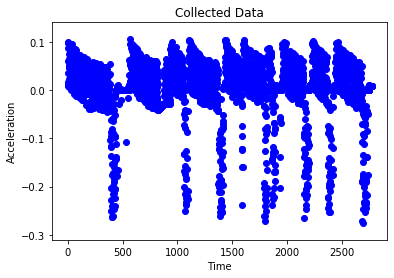

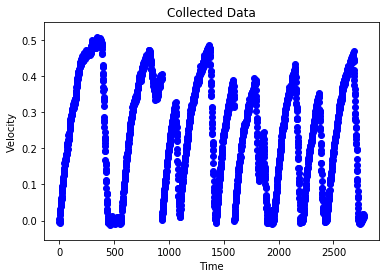

In [44]:
'''
Load data points from json file
'''
data_points = json.load(open("simple_data_points.json", "r"))

'''
These lists will all be of length equal to the
number of available data points. The first list
will store the time each data point was logged,
the second the 3-dimensional inputs discussed below,
and the third the acceleration values.
'''
all_times = []
all_inps = []
all_outs = []

'''
These lists will store the same values as the ones
above, except they will omit a specific set of data
points that exhibit non linear behavior.  More on this
below.
'''
filt_times = []
filt_inps = []
filt_outs = []


'''
t: 0 to (N - 1)
ped: 'accelerator', 'brake', or None
amt: 0 to 1
vel: 0 to 1
acc: 0 to 1
'''
for t, (ped, amt, vel, acc) in enumerate(data_points):
    
    '''
    We are trying to fit a linear model for acceleration
    that uses three values for inputs: the accelerator depression
    amount, the brake depression amount, and the velocity.  Further
    we will fit an intercept as well (bias).
    
    In order to do this we format our data as input output pairs where
    input is a list consisting of the the appropriate linear dependencies
    and the output is the corresponding acceleration.
    
    Your code should result in 'inp' referencing a list of length 3 that 
    contains: [accelerator amount, brake amount, velocity]
    '''
    
    #CODE HERE
    
    if (ped == "accelerator"):
        inp = [acc, 0, vel]
    elif (ped == 'brake'):
        inp = [0, amt, vel]
    else:
        inp = [0, 0, vel]
    
    all_inps.append(inp)
    all_outs.append(acc)
    all_times.append(t)

    '''
    You may notice that your linear model struggles with a specific scenario.
    This scenario results in your linear model being a poor fit for the general trend.
    Specifically there is a specific circumstance in which acceleration behaves nonlinearly,
    and it hurts the model to accomodate this.
    Here we will remedy this issue by filtering out the nonlinear scenario and fit a better
    linear model to the true linear data.
    HINT: Do you ever move backwards when in forward gear? When might the model think you should?
    '''
    #CODE HERE (replace 'True')
    if (abs(acc)<.2):
        filt_inps.append(inp)
        filt_outs.append(acc)
        filt_times.append(t)



plt.title("Collected Data")
plt.xlabel("Time")
plt.ylabel("Acceleration")
plt.scatter(all_times, all_outs, color = 'b')
plt.show()

plt.title("Collected Data")
plt.xlabel("Time")
plt.ylabel("Velocity")
plt.scatter(all_times, [vel for (_, _, vel) in all_inps], color = 'b')
plt.show()

## Coefficient Estimation via Linear Regression

Model Fit 0.8066003368322617
Model Predictions:
Accelerator Weight: 0.9310142653342303
Brake Weight: -0.20260073156791933
Friction Constant: -0.07058763078222477
Rolling Bias: 0.019537621349392548
___________________________________________


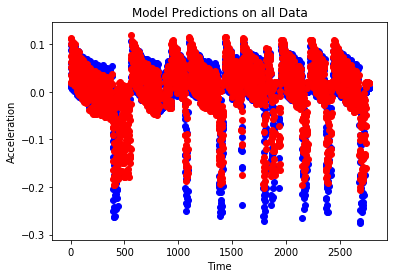

In [45]:
'''
Lookup the sklearn LinearRegression documenation if need be.
Alternatively you may reference housing_demo.py

1. Instantiate a LinearRegression Model.
2. Fit the model with all inputs and all outputs.
3. Assign 'fit_score' to the sklearn score on the inputs and outputs.
4. Extract the learned coefficients and intercept (see coef_ and intercept_ attributes)
'''

#CODE HERE
model = LinearRegression()
model.fit(all_inps, all_outs)
fit_score = model.score(all_inps, all_outs)
coef = model.coef_
intercept = model.intercept_


print(f"Model Fit {fit_score}")
print(f"Model Predictions:")


'''
Fill in the blanks in the next 4 lines with
references to the 4 learned coefficients

Remember the linear model is as follows:
accel = c_1 * accel_amt + c_2* brake_amt + c_3 * v + c_4

c_1: accelerator_weight
c_2: brake_weight
c_3: -friction_constant
c_4: rolling_bias
'''
print(f"Accelerator Weight: {coef[0]}")
print(f"Brake Weight: {coef[1]}")
print(f"Friction Constant: {coef[2]}")
print(f"Rolling Bias: {intercept}")
print("___________________________________________")

plt.clf()
plt.title("Model Predictions on all Data")
plt.xlabel("Time")
plt.ylabel("Acceleration")
plt.scatter(all_times, all_outs, color = 'b')
plt.scatter(all_times, model.predict(all_inps), color = 'r')
plt.show()

In [46]:
'''
You may use this function as is to evaluate the accuracy of
the model coefficients you have discovered.
'''
def evaluate(preds, targets, tol = 0.02):
    correct = 0
    errors = []

    for i, (prediction, target) in enumerate(zip(preds, targets)):
        print(f"EVALUATING {i + 1}/{len(all_inps)}", end = "\r")

        if (abs(prediction - target) < tol):
            correct += 1
        errors.append(prediction - target)

    print(f"WITHIN {tol} {correct}/{len(targets)} times")
    print(f"MEDIAN ERROR {np.median(np.abs(errors)):.4f}")

    plt.title("Error Distribution")
    plt.hist(errors, bins = 200, range = (-0.15, 0.15))
    plt.show()

WITHIN 0.02 2265/2776 times
MEDIAN ERROR 0.0096


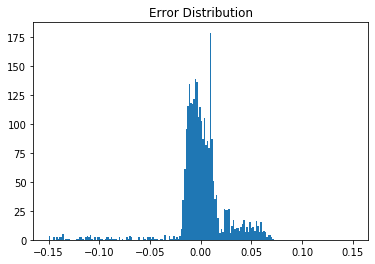

In [47]:
evaluate(preds = model.predict(all_inps), targets = all_outs)

Model Fit 0.7486080061505085
Accelerator Weight: 0.9878354897947337
Brake Weight: -0.14681518083511222
Friction Constant: -0.04790913397848393
Rolling Bias: 0.011007320528272439
___________________________________________


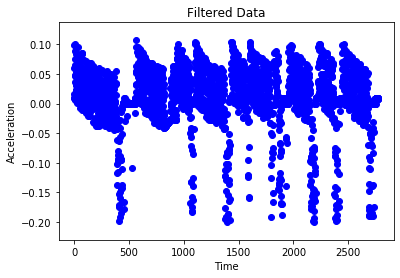

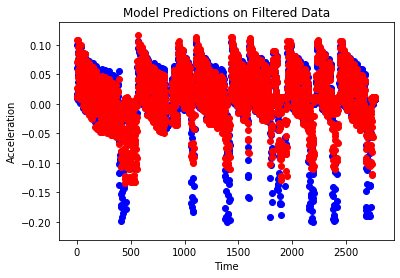

In [48]:
'''
Repeat the previous process but now using the filtered
input and outputs only.
'''

#CODE HERE
model = LinearRegression()
model.fit(filt_inps, filt_outs)
fit_score = model.score(filt_inps, filt_outs)
coef = model.coef_
intercept = model.intercept_

print(f"Model Fit {fit_score}")


'''
Fill in the blanks as in the previous section
'''
print(f"Accelerator Weight: {coef[0]}")
print(f"Brake Weight: {coef[1]}")
print(f"Friction Constant: {coef[2]}")
print(f"Rolling Bias: {intercept}")
print("___________________________________________")


plt.clf()
plt.title("Filtered Data")
plt.scatter(filt_times, filt_outs, color = 'b')
plt.xlabel("Time")
plt.ylabel("Acceleration")
plt.show()

plt.clf()
plt.title("Model Predictions on Filtered Data")
plt.xlabel("Time")
plt.ylabel("Acceleration")
plt.scatter(filt_times, filt_outs, color = 'b')
plt.scatter(filt_times, model.predict(filt_inps), color = 'r')
plt.show()

WITHIN 0.02 2269/2688 times
MEDIAN ERROR 0.0065


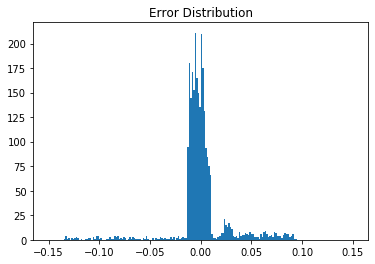

In [49]:
evaluate(preds = model.predict(filt_inps), targets = filt_outs)

## Model Evaluation

Before you can evaluate our learned coefficients you will have to complete the controller_model.py file.  We will use the controller_model file to mimic the actual controller.

1. Around line 41 replace the 'None' placeholders with your learned coefficients.
2. Around line 115 follow the instructional comments to compute acceleration as a function of the pedal inputs.
3. Around line 163 follow the instructional comments to update position and velocity, assuming constant acceleration over the dt length time interval.

Once you complete these steps you should be able to run the simulator in sysID_test mode (command below).

python simulator.py --mode sysID_test

Once you are able to successfully run this, drive around for a bit.  Just as we provide inputs to the actual controller Car_Interface, we will provide controls to the controller_model Car_Interface.  We consider the average discrepancy between the model velocity and the actual velocity over the last 100 time steps as the model error.

You will notice your average error being displayed in your terminal window (after an preliminary period).  You will be checked off if the maximum average error does not exceed the threshold of 0.75% (an exception will be raised if it does). (NOTE: just noise will result in a perfect model having an error of ~0.4%)